<a href="https://colab.research.google.com/github/arumshin-dev/python_conda_jupyter/blob/main/codeit/250822_%EC%BD%94%EB%94%A9%EC%8B%A4%EC%8A%B58_9_%EA%B8%B0%EB%B3%B8_%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98%EB%93%A4_(%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Iris 데이터로 이진 분류
붓꽃 데이터
## 이진분류의 교과서적 데이터 - 아이리스 데이터

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
# from sklearn.datasets import load_iris
# 데이터 로드
iris_dataset = load_iris()
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
# X=iris_dataset.data
# y=iris_dataset.target
X=iris_dataset.data[:,:2]# 앞의 2 피쳐만 사용(시각화 위해!)
y=(iris_dataset.target==0).astype(int)# 붓꽃 품종 1개 vs 나머지

In [4]:
# 모델 학습
model = LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [5]:
# 시각화용 격자 생성 코드
#처음 0번째 최대,최소 약간 범위 주면서 x축 생성
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
#1번째 최대,최소 약간 범위 주면서 y축 생성
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
#200X200 격자 생성
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
# 모델이 예측한 클래스 라벨 계산
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
# Z를 격자 형태로 변형 -> 2D
Z = Z.reshape(xx.shape)

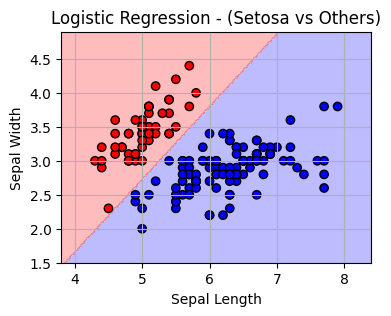

In [6]:
# matplotlib contourf() 등고선 표현해주는 함수
# 이진 변수의 등고선 느낌을 표현 해주려고 사용
# 시각화
# plt.figure(figsize=(4,3))
# plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
# plt.xlabel('Sepal length')
# plt.ylabel('Sepal width')
# plt.xlim(xx.min(), xx.max())
# plt.ylim(yy.min(), yy.max())
# 시각화
plt.figure(figsize=(4,3))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')# plt.contourf() 함수를 사용하여 결정 경계 영역에 색을 채웠습니다.
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', edgecolors='black')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title("Logistic Regression - (Setosa vs Others)")
plt.grid(True)
plt.show()

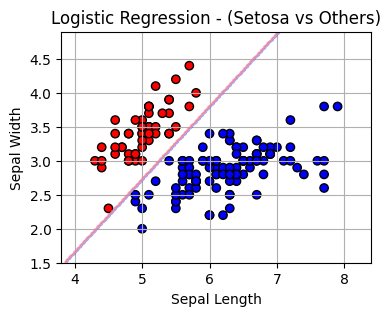

In [7]:
plt.figure(figsize=(4,3))
plt.contour(xx, yy, Z, alpha=0.3, cmap='bwr')#plt.contour() 함수를 사용하여 결정 경계 자체를 선으로 표현
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr',edgecolors='black')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Logistic Regression - (Setosa vs Others)')
# plt.xlim(xx.min(), xx.max())
# plt.ylim(yy.min(), yy.max())
plt.grid(True)
plt.show()

# 2. Iris 데이터로 다중 분류

In [8]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# 데이터 로드
iris = load_iris()

In [10]:
X = iris.data[:, :2]# 앞 2개만 사용(시각화 위해!)
y= iris.target
class_names = iris.target_names # Iris 데이터의 각 클래스 이름을 가져옴

In [11]:
np.array([iris.target_names])

array([['setosa', 'versicolor', 'virginica']], dtype='<U10')

In [12]:
# 시각화용 격자 생성 코드

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5          # x축
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5          # y축
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))           # 200X200 격자 생성
# Z = model.predict(np.c_[xx.ravel(), yy.ravel()])               # 모델이 예측한 클래스 라벨 계산
# Z = Z.reshape(xx.shape)                                        # Z를 격자 형태로 변형 -> 2D
grid = np.c_[xx.ravel(), yy.ravel()]

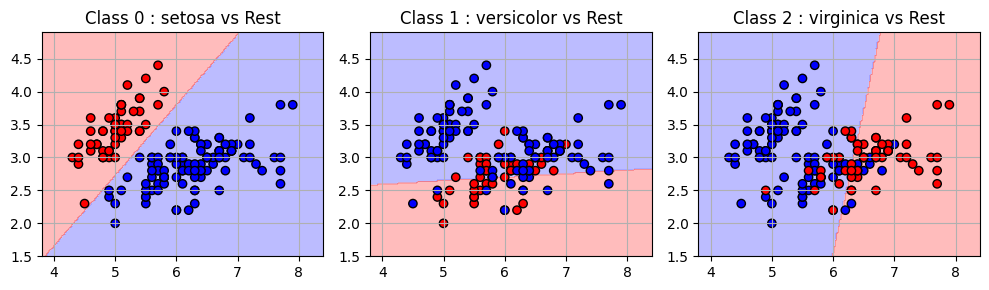

In [13]:
# 모델링 & 시각화

plt.figure(figsize=(10,3))

for i in range(3):
    binary_y = (y==i).astype(int)                  # OvR -> 이진 라벨 생성
    model = LogisticRegression()
    model.fit(X, binary_y)

    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.subplot(1,3,i+1)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=binary_y, cmap='bwr',edgecolors='black')
    plt.title(f'Class {i} : {class_names[i]} vs Rest')
    plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# 데이터 로드
iris = load_iris()

In [ ]:
X = iris.data[:, :2]# 앞 2개만 사용(시각화 위해!)
y= iris.target
class_names = iris.target_names # Iris 데이터의 각 클래스 이름을 가져옴

In [14]:
# Softmax 회r 모델링
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X, y)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [15]:
# 시각화용 격자 생성 코드

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5          # x축
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5          # y축
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))           # 200X200 격자 생성
grid = np.c_[xx.ravel(), yy.ravel()]

In [16]:
# 예측값
Z = model.predict(grid)
Z = Z.reshape(xx.shape)

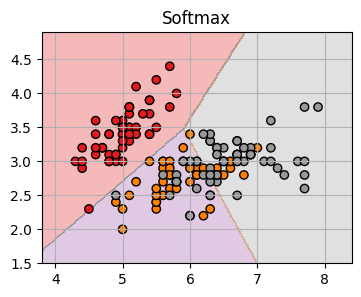

In [17]:
plt.figure(figsize=(4,3))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Set1')
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Set1',edgecolors='black')
plt.title('Softmax')
plt.grid(True)
plt.show()

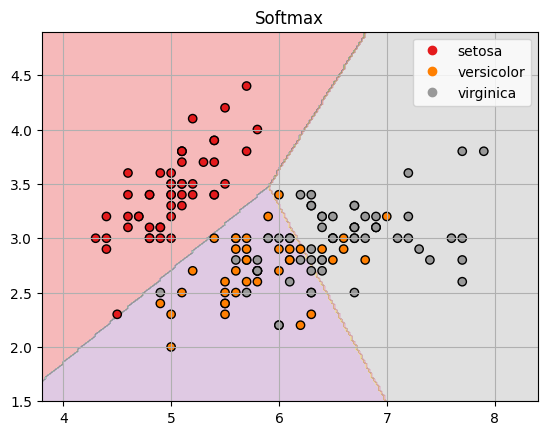

In [25]:
# plt.figure(figsize=(4,3))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Set1')
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Set1',edgecolors='black')
plt.title('Softmax')
handles, auto_labels = scatter.legend_elements()
labels = [class_names[int(l.strip('$\\mathdefault{}'))] for l in auto_labels]
plt.legend(handles=handles, labels=labels)
plt.grid(True)
plt.show()

In [ ]:
# plt.figure(figsize=(4,3))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Set1')
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Set1',edgecolors='black')
plt.title('Softmax')
handles, auto_labels = scatter.legend_elements()
labels = [class_names[int(l.strip('$\\mathdefault{}'))] for l in auto_labels]
plt.legend(handles=handles, labels=labels)
plt.grid(True)
plt.show()

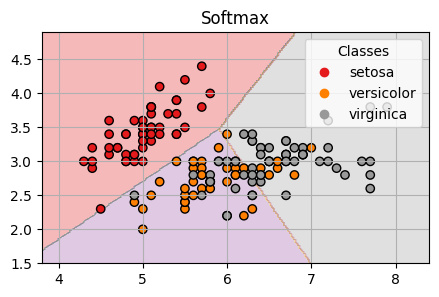

In [ ]:
# 시각화

plt.figure(figsize=(5,3))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Set1')
scatter = plt.scatter(X[:,0], X[:,1], c=y, cmap='Set1', edgecolors='black')

# legend 지정 위한 코드
handles, _ = scatter.legend_elements()

plt.title('Softmax')
plt.legend(handles, class_names, title="Classes")
plt.grid(True)
plt.show()

#### **handles, _ = scatter.legend_elements() 코드 설명**

- **legend_elements()**
    - (handles, label) 두 값을 반환
        - https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_with_legend.html
        - scatter plot이 튜플 반환
    - handles: 스캐터 플롯에 표현되는 작은 점
    - label: 0, 1, 2처럼 자동 생성된 클래스 이름 문자열
- scatter.legend_elements()는 handles, label을 반환하지만, 클래스 이름을 실제 label로 사용해 보여주고자 함
- handles, _ = scatter.legend_elements()로 변수를 두 개 지정할 때, handles는 가져오고 labels는 무시한다는 의미로 **아래 밑줄**을 사용
    - 아래 밑줄: 파이썬의 관례적인 표현
        1. 사용하지 않는 값 무시
        2. 표현식의 마지막 결과값 저장
        3. 내부 문서 의미